IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\ADMIN\Desktop\twitter_training.csv')

In [3]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


RENAMING THE COLUMN NAMES

In [4]:
df.rename(columns={'2401':'id','Borderlands':'Company','Positive':'Sentiment','im getting on borderlands and i will murder you all ,':'Text'},inplace=True)

In [5]:
df.columns

Index(['id', 'Company', 'Sentiment', 'Text'], dtype='object')

In [6]:
df.shape

(74681, 4)

In [7]:
df.describe()

,id
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


CHECKING AND FILLING THE MISSING VALUES IN THE DATASET

In [8]:
df.isnull().sum()

id             0
Company        0
Sentiment      0
Text         686
dtype: int64

In [9]:
df.dropna()

,id,Company,Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74681 non-null  int64 
 1   Company    74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Text       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [11]:
df['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [12]:
df['Company'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

FINDING THE NUMBER OF SENTIMENTS FROM EACH COMPANY

In [13]:
df.groupby('Company')['Sentiment'].value_counts()

Company          Sentiment 
Amazon           Neutral       1236
                 Negative       576
                 Positive       312
                 Irrelevant     192
ApexLegends      Neutral        942
                               ... 
Xbox(Xseries)    Negative       378
johnson&johnson  Neutral       1014
                 Negative       846
                 Positive       270
                 Irrelevant     198
Name: count, Length: 128, dtype: int64

# DATA VISUALIZATION

CALCULATING TOTAL NUMBER OF SENTIMENTS FOR GROUP

Text(0.5, 1.0, 'Count of each sentiment')

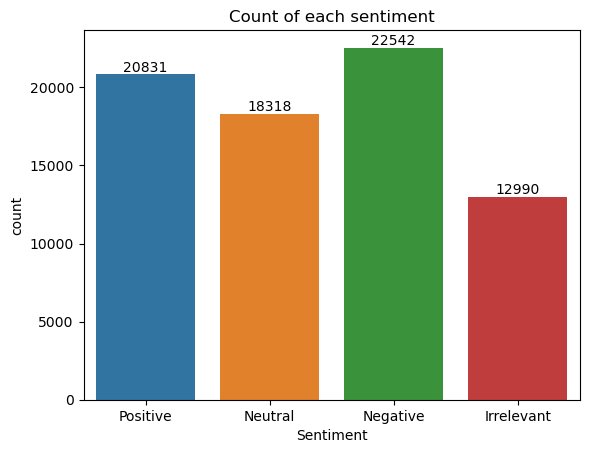

In [14]:
ax=sns.countplot(data=df, x='Sentiment')

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Count of each sentiment')    

CHECKING TOTAL NUMBER OF POSITIVE SENTIMENTS FROM EACH COMPANY

In [15]:
df[df['Sentiment']=='Positive']['Company'].value_counts()

Company
AssassinsCreed                       1446
Borderlands                          1019
Cyberpunk2077                         966
PlayStation5(PS5)                     942
RedDeadRedemption(RDR)                930
CallOfDutyBlackopsColdWar             864
Hearthstone                           834
Nvidia                                816
Xbox(Xseries)                         792
HomeDepot                             780
CS-GO                                 768
WorldOfCraft                          738
Overwatch                             732
ApexLegends                           642
GrandTheftAuto(GTA)                   624
TomClancysGhostRecon                  618
LeagueOfLegends                       618
Microsoft                             606
Battlefield                           594
Dota2                                 582
Fortnite                              564
TomClancysRainbowSix                  528
Verizon                               528
FIFA                      

<Axes: ylabel='Company'>

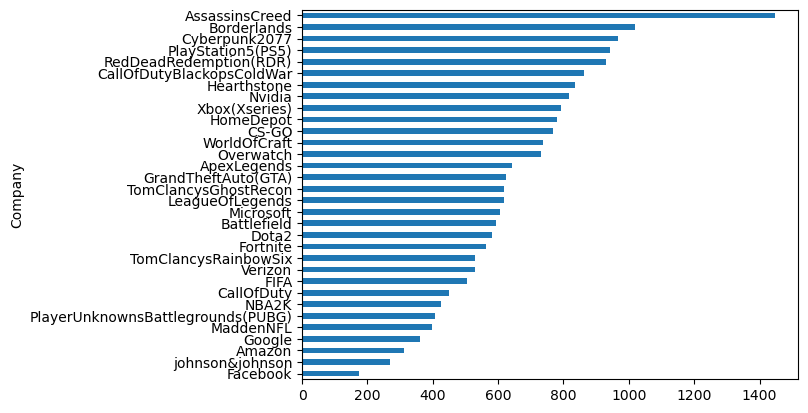

In [16]:
df[df['Sentiment']=='Positive']['Company'].value_counts().sort_values().plot(kind='barh')

CHECKING TOTAL NUMBER OF NEGATIVE SENTIMENTS FROM EACH COMPANY

In [17]:
df[df['Sentiment']=='Negative']['Company'].value_counts()

Company
MaddenNFL                            1710
NBA2K                                1476
FIFA                                 1176
TomClancysRainbowSix                 1122
Verizon                              1098
HomeDepot                             900
TomClancysGhostRecon                  900
CallOfDuty                            894
johnson&johnson                       846
Microsoft                             774
Dota2                                 768
Facebook                              720
Fortnite                              702
PlayerUnknownsBattlegrounds(PUBG)     696
LeagueOfLegends                       642
Overwatch                             630
ApexLegends                           600
Google                                594
GrandTheftAuto(GTA)                   594
CallOfDutyBlackopsColdWar             576
Amazon                                576
Hearthstone                           528
Nvidia                                522
Battlefield               

<Axes: ylabel='Company'>

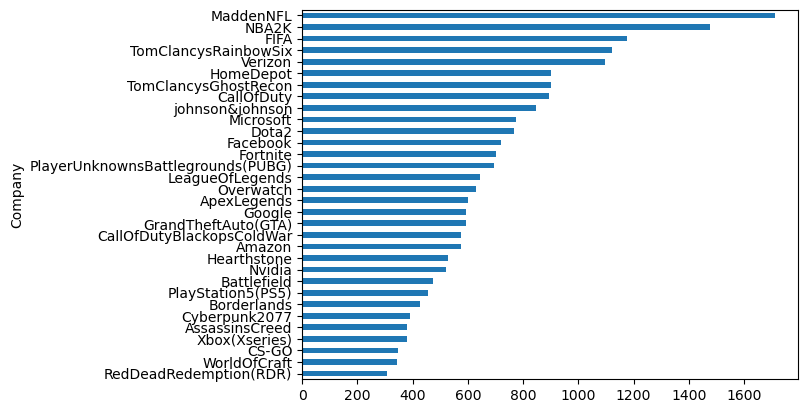

In [18]:
df[df['Sentiment']=='Negative']['Company'].value_counts().sort_values().plot(kind='barh')

CHECKING TOTAL NUMBER OF NEUTRAL SENTIMENTS FROM EACH COMPANY

In [19]:
df[df['Sentiment']=='Neutral']['Company'].value_counts()

Company
Amazon                               1236
WorldOfCraft                         1068
johnson&johnson                      1014
ApexLegends                           942
Nvidia                                870
Microsoft                             846
LeagueOfLegends                       822
Google                                822
RedDeadRedemption(RDR)                816
TomClancysGhostRecon                  804
Facebook                              786
Hearthstone                           708
TomClancysRainbowSix                  654
Borderlands                           600
Dota2                                 588
Verizon                               570
CS-GO                                 552
PlayStation5(PS5)                     516
Cyberpunk2077                         468
Xbox(Xseries)                         414
CallOfDuty                            378
CallOfDutyBlackopsColdWar             360
Battlefield                           360
HomeDepot                 

<Axes: ylabel='Company'>

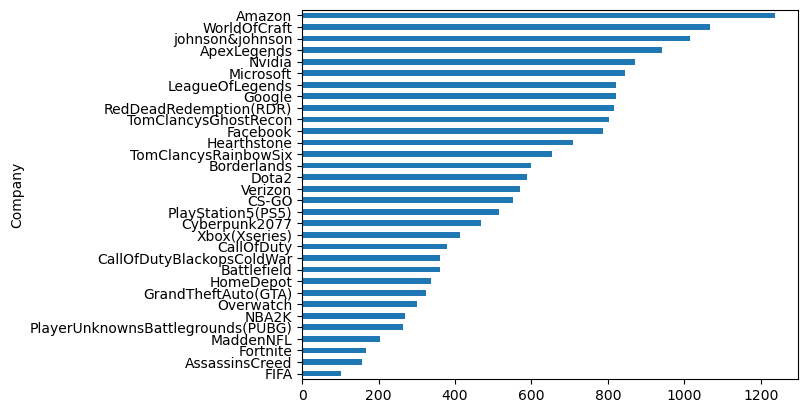

In [20]:
df[df['Sentiment']=='Neutral']['Company'].value_counts().sort_values().plot(kind='barh')

CHECKING TOTAL NUMBER OF IRRELEVANT SENTIMENTS FROM EACH COMPANY

In [21]:
df[df['Sentiment']=='Irrelevant']['Company'].value_counts()

Company
Battlefield                          918
PlayerUnknownsBattlegrounds(PUBG)    906
Fortnite                             840
GrandTheftAuto(GTA)                  762
Xbox(Xseries)                        750
Facebook                             690
Overwatch                            672
CallOfDuty                           672
CS-GO                                636
CallOfDutyBlackopsColdWar            576
FIFA                                 558
Google                               522
Cyberpunk2077                        480
Dota2                                426
PlayStation5(PS5)                    396
LeagueOfLegends                      312
HomeDepot                            294
AssassinsCreed                       264
Borderlands                          240
Hearthstone                          228
WorldOfCraft                         216
RedDeadRedemption(RDR)               210
johnson&johnson                      198
ApexLegends                          192
Amazon  

<Axes: ylabel='Company'>

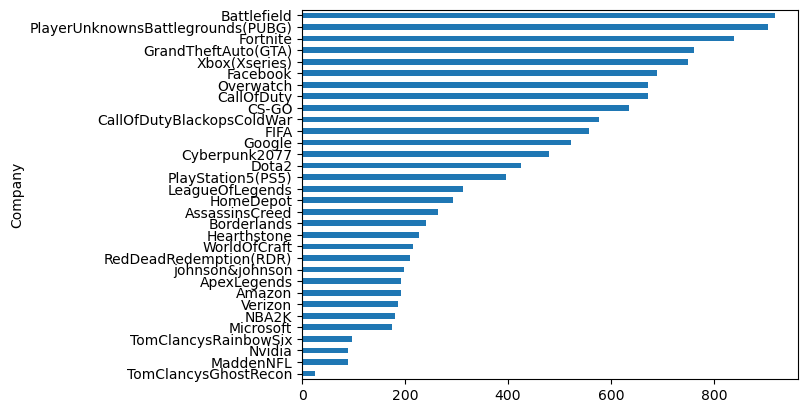

In [22]:
df[df['Sentiment']=='Irrelevant']['Company'].value_counts().sort_values().plot(kind='barh')